# Binary Classification - Evaluation

* Topic: Parkinson's Disease
* Prompt: You are a neuroscience expert specializing in ion channel and current analysis. Given the following content:\n\n{file_content}\n\n Please identify whether this content contains relevant information about {topic}. If the answer is yes, please answer Y; otherwise, answer N. DO NOT analyze.

In [18]:
# utils
import pandas as pd
import json
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# load results
OUTPUT_DIR = "binary_classification_test.json"
LABELS_DIR = "binary_labels_Parkinson.csv"

In [7]:
df = pd.read_csv(LABELS_DIR)
df["code"] = df["code"].astype(int)
df.head()

,code,label,file_id
0,64255,1,01W2ZTQFSDSKFOYYVSCJCIP3BP67N3FDEC
1,79465,1,01W2ZTQFTECH6N6Q62NJB2SBTMMDLJXNK7
2,79488,1,01W2ZTQFURO2OSVZBXLJHLDCUDBBYICD3E
3,83559,1,01W2ZTQFXO7GYLC4GQ4ZGJ4NCA5SPVJFMC
4,83560,1,01W2ZTQFUYVY66AYU6PFGLBZRLEZIUWRSR


In [12]:
with open(OUTPUT_DIR, 'r', encoding='utf-8') as f:
    results_json = json.load(f)
results_df = pd.DataFrame(list(results_json.items()), columns=["code", "result"])
results_df["code"] = results_df["code"].astype(int)
results_df["result"] = results_df["result"].map({"Y": 1, "N": 0})
results_df.head()

,code,result
0,64255,1
1,266901,0
2,83560,1
3,26997,0
4,140828,0


In [13]:
merged_df = pd.merge(results_df, df, on="code", how="left")
merged_df

,code,result,label,file_id
0,64255,1,1,01W2ZTQFSDSKFOYYVSCJCIP3BP67N3FDEC
1,266901,0,0,01W2ZTQFTDSG36VBQAJFBJIPIZGAC6MOAN
2,83560,1,1,01W2ZTQFUYVY66AYU6PFGLBZRLEZIUWRSR
3,26997,0,0,01W2ZTQFT7UWD7GWGH2BC23MUWHWNW5M4X
4,140828,0,0,01W2ZTQFQGMDDWWIP755AINO4DXGISNGKG
...,...,...,...,...
90,262431,0,1,01W2ZTQFQDM2C6ORDDDFG3RVGR2NSEZ5HR
91,266929,0,0,01W2ZTQFTQFP4AVDWZ7NGZMBXITSRQFHZ2
92,227005,0,0,01W2ZTQFXFFVQQAIKZENG2OR6NZYSKPMPR
93,20756,0,0,01W2ZTQFVD5ZXPLCVHVRAZCNVT44Z7PDS2


In [16]:
# Calculate metrics
accuracy = accuracy_score(merged_df["label"], merged_df["result"])
precision = precision_score(merged_df["label"], merged_df["result"])
recall = recall_score(merged_df["label"], merged_df["result"])
f1 = f1_score(merged_df["label"], merged_df["result"])

# Display results
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Evaluation Metrics:
Accuracy: 0.85
Precision: 1.00
Recall: 0.70
F1 Score: 0.82


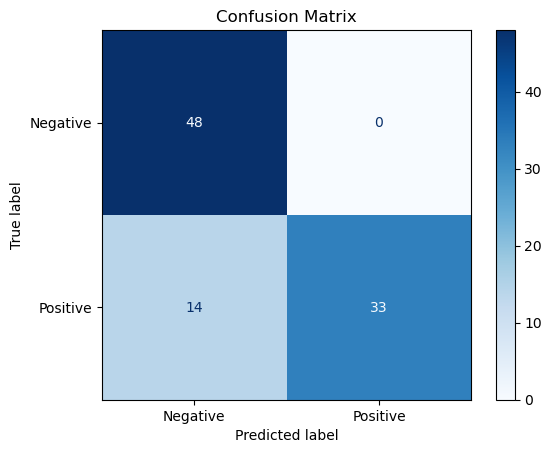

In [19]:
# Compute confusion matrix
cm = confusion_matrix(merged_df["label"], merged_df["result"], labels=[0, 1])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()